In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [45]:
df = pd.read_csv("../peugeot_207_02.csv")
# print(df.head())
df = df.dropna()
df.head(10)

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-0.599998,24.299999,8.720689,46.843772,6.299999,-1.2903,67.058823,26,115,1809.0,22.360001,15,0.1468,28.784592,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
1,60,0.099998,27.900000,9.045762,52.270798,3.600000,-1.4038,0.000000,26,107,947.5,23.129999,17,0.2022,28.728073,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
2,61,-0.200001,30.599998,9.405000,59.127937,2.699999,-1.3209,28.235294,26,103,797.0,10.130000,17,0.1834,27.799021,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
3,62,-0.899998,29.699999,9.900000,64.360674,-0.900000,-1.4974,0.000000,26,101,1112.0,6.050000,15,0.2099,26.150261,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
4,63,-0.900002,28.799999,10.380000,68.519589,-0.900000,-1.3275,71.764709,26,102,1150.0,11.740000,15,0.2898,25.721266,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
5,64,-1.400002,27.900000,10.845000,71.676072,-0.900000,-1.5180,66.666664,26,102,1150.0,14.050000,14,0.2122,25.441977,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
6,65,-1.200001,28.799999,11.325000,74.912411,0.900000,-1.5972,65.882355,27,102,1218.5,14.580000,14,0.1779,25.155003,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
7,66,-0.200001,30.599998,11.835000,78.771123,1.799999,-1.6831,61.960785,27,102,1288.0,14.550000,14,0.2392,24.858875,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
8,67,-0.700001,32.399998,12.375000,83.268681,1.799999,-1.8255,57.647060,27,102,1333.0,14.910000,14,0.2365,24.575048,UnevenCondition,NormalCongestionCondition,EvenPaceStyle
9,68,-0.500000,33.299999,12.930000,87.781113,0.900002,-1.7848,40.784313,27,102,1368.5,14.860000,14,0.3247,24.283182,UnevenCondition,NormalCongestionCondition,EvenPaceStyle


In [47]:
del df['AltitudeVariation']
del df['VehicleSpeedVariance']
del df['EngineCoolantTemperature']
del df['roadSurface']
del df['traffic']

In [51]:
df.drivingStyle.unique()

array(['EvenPaceStyle', 'AggressiveStyle'], dtype=object)

In [52]:
def classify_driving_style(row):
    if row['drivingStyle'] ==  'EvenPaceStyle':
        return 1
    else:
        return 0

In [55]:
df['driving_style_class'] = df.apply (lambda row: classify_driving_style(row), axis=1)

In [63]:
df.head()

,Unnamed: 0,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle,driving_style_class
0,59,24.299999,8.720689,6.299999,-1.2903,67.058823,115,1809.0,22.360001,15,0.1468,28.784592,EvenPaceStyle,1
1,60,27.900000,9.045762,3.600000,-1.4038,0.000000,107,947.5,23.129999,17,0.2022,28.728073,EvenPaceStyle,1
2,61,30.599998,9.405000,2.699999,-1.3209,28.235294,103,797.0,10.130000,17,0.1834,27.799021,EvenPaceStyle,1
3,62,29.699999,9.900000,-0.900000,-1.4974,0.000000,101,1112.0,6.050000,15,0.2099,26.150261,EvenPaceStyle,1
4,63,28.799999,10.380000,-0.900000,-1.3275,71.764709,102,1150.0,11.740000,15,0.2898,25.721266,EvenPaceStyle,1


<AxesSubplot:xlabel='driving_style_class', ylabel='count'>

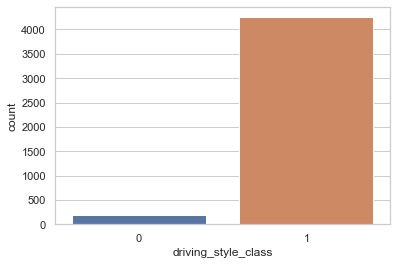

In [65]:
# EvenPaceStyle = 1, AggressiveStyle = 0
sns.countplot(x='driving_style_class', data=df)